In [22]:
mock_data_with_parking = pd.DataFrame({
    'HEURE_DEPART': [8, 10.5, 15, 18],
    'HEURE_ARRIVEE': [9.5, 12, 16.5, 19],
    'Lieu_Depart': ['Maison', 'Travail', 'Magasin', 'Maison'],
    'Lieu_Arrivee': ['Travail', 'Magasin', 'Maison', 'Maison'],
    'Stationnement': [
        'Emplacement privé, gratuit (y compris domicile)', 
        'Sur la voie publique', 
        'Emplacement dans un parking public ou commercial payant', 
        'Emplacement privé, gratuit (y compris domicile)'
    ],
    'num_dep_V': [1, 2, 3, 4]
})

In [23]:
display(mock_data_with_parking)

,HEURE_DEPART,HEURE_ARRIVEE,Lieu_Depart,Lieu_Arrivee,Stationnement,num_dep_V
0,8.0,9.5,Maison,Travail,"Emplacement privé, gratuit (y compris domicile)",1
1,10.5,12.0,Travail,Magasin,Sur la voie publique,2
2,15.0,16.5,Magasin,Maison,Emplacement dans un parking public ou commerci...,3
3,18.0,19.0,Maison,Maison,"Emplacement privé, gratuit (y compris domicile)",4


In [24]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

def plot_individual_travels_final(travel_data):
    """
    Final version to plot the daily travels of an individual including parking information before the first departure
    and after the last arrival until midnight. This version ensures uniform line thickness and better visibility
    for parking information.
    
    Parameters:
    - travel_data: DataFrame containing the travel information for an individual, including departure and arrival times,
      parking locations, departure locations, trip number, and parking information.
    """
    # Ensure the data is sorted by departure time
    travel_data_sorted = travel_data.sort_values(by='HEURE_DEPART')
    
    # Start plotting
    fig, ax = plt.subplots(figsize=(12, 2))
    
    # Initial and final parking locations, and their abbreviations
    initial_parking_location = travel_data_sorted.iloc[0]['Lieu_Depart']
    final_parking_location = travel_data_sorted.iloc[-1]['Lieu_Arrivee']
    parking_abbreviations = {'Emplacement privé, gratuit (y compris domicile)': 'EPG',
                             'Emplacement dans un parking public ou commercial payant': 'EPP',
                             'Sur la voie publique': 'VP'}
    
    # Color map for parking locations
    color_map = {'Initial Parking': 'lightgray', 'Final Parking': 'darkgray'}
    colors = plt.cm.tab10.colors  # Using tab10 colormap for up to 10 parking locations
    
    # Plot initial parking segment (from midnight to first departure)
    first_departure = travel_data_sorted.iloc[0]['HEURE_DEPART']
    ax.plot([0, first_departure], [1, 1], color='lightgray', linewidth=8)
    
    # Loop through each trip to plot
    for index, row in travel_data_sorted.iterrows():
        start = row['HEURE_DEPART']
        end = row['HEURE_ARRIVEE']
        parking_location = row['Lieu_Arrivee']
        parking_info = row.get('Stationnement', 'Unknown')
        
        # Assign a color for each parking location (if not initial or final parking)
        if parking_location not in color_map:
            color_map[parking_location] = colors[len(color_map) % len(colors)]
        
        # Plot the travel segment
        ax.plot([start, end], [1, 1], color='black', linewidth=8)  # Uniform line thickness for travel
        
        # Plot the parking segment with slight spacing
        if index < len(travel_data_sorted) - 1:
            next_start = travel_data_sorted.iloc[index + 1]['HEURE_DEPART']
            ax.plot([end, next_start], [1, 1], color=color_map[parking_location], linewidth=8)  # Uniform line thickness for parking
            # Add abbreviated text for parking information, placed closer to the line
            abbreviation = parking_abbreviations.get(parking_info, 'Unk')
            ax.text((end + next_start) / 2, 1.02, abbreviation, ha='center', va='bottom', fontsize=8, backgroundcolor='white')
    
    # Plot final parking segment (from last arrival to midnight)
    last_arrival = travel_data_sorted.iloc[-1]['HEURE_ARRIVEE']
    ax.plot([last_arrival, 24], [1, 1], color='darkgray', linewidth=8)  # Uniform line thickness for final parking
    
    # Improving the plot aesthetics
    ax.set_xlim(0, 24)  # Set x-axis to span from midnight to midnight
    ax.set_yticks([])  # Hide y-axis as it's not relevant
    ax.set_xlabel("Heure")
    plt.title("Déplacements journaliers d'un individu avec stationnements initial et final")
    # Create legend entries for parking locations
    legend_entries = [mpatches.Patch(color=color, label=label) for label, color in color_map.items() if label not in ['Initial Parking', 'Final Parking']]
    # Optionally, add entries for initial and final parking if desired
    legend_entries.append(mpatches.Patch(color='lightgray', label='Parking initial'))
    legend_entries.append(mpatches.Patch(color='darkgray', label='Parking final'))
    # Add legend to the plot
    ax.legend(handles=legend_entries, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage with the provided mock DataFrame
# Ensure your DataFrame includes 'Stationnement' column with parking information.


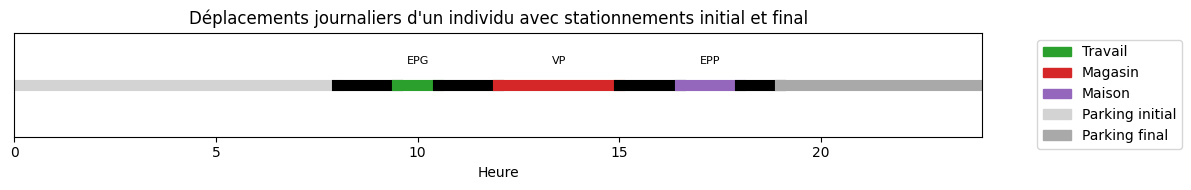

In [25]:
plot_individual_travels_final(mock_data_with_parking)